In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [180]:
base_url = "https://raw.githubusercontent.com/pranta-iitp/Real-Estate-Property-Price-Prediction-Project/main/outliers_removed_data.csv"
df = pd.read_csv(base_url)

In [181]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
pricePerSqft,0
area,0
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


#### 1.First we will feel the missing values of column *built_up_area*, because this column will be our actual area.

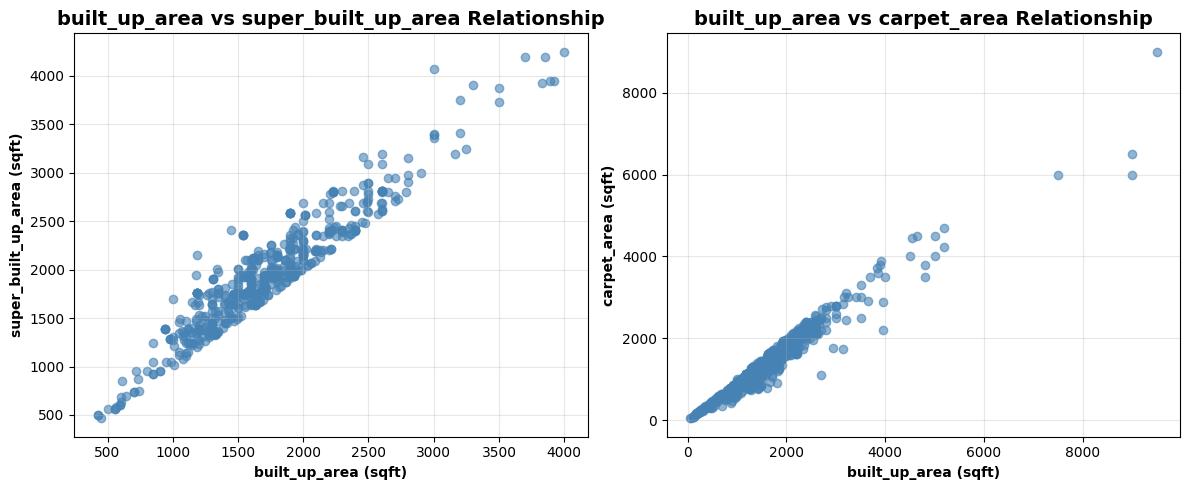

In [182]:
 # Check distribution shape
plt.figure(figsize=(12, 5))

# Basic scatter plot
plt.subplot(1, 2, 1)
plt.scatter(df['built_up_area'], df['super_built_up_area'], alpha=0.6, color='steelblue')
plt.xlabel('built_up_area (sqft)', fontweight='bold')
plt.ylabel('super_built_up_area (sqft)', fontweight='bold')
plt.title('built_up_area vs super_built_up_area Relationship', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.scatter(df['built_up_area'], df['carpet_area'], alpha=0.6, color='steelblue')
plt.xlabel('built_up_area (sqft)', fontweight='bold')
plt.ylabel('carpet_area (sqft)', fontweight='bold')
plt.title('built_up_area vs carpet_area Relationship', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### We can see a strong linear relationship between *super_built_up_area* and *built_up_area* and between *carpet_built_up_area* and *built_up_area*.

In [183]:
df[df['super_built_up_area'].isnull() & df['built_up_area'].isnull() & df['carpet_area'].isnull()]

,property_type,society,sector,price,pricePerSqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,others,store room,pooja room,servant room,furnishing_type,luxury_score,area_per_bedroom


In [184]:
# There is no such record where all the three values in the columns super_built_up_area,built_up_area,carpet_area are missing together

In [185]:
all_present_df = df[((df['super_built_up_area'].isnull() == False) & (df['built_up_area'].isnull() == False) & (df['carpet_area'].isnull() == False))]

In [186]:
all_present_df.shape

(526, 24)

In [187]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.104164619164619 0.9


In [188]:
# both built_up_area and  super_built_up_area present but built up absent
temp_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [189]:
temp_df['built_up_area'].fillna(round(((temp_df['super_built_up_area']/1.105) + (temp_df['carpet_area']/0.9))/2),inplace=True)

In [190]:
df.update(temp_df)

In [191]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
pricePerSqft,0
area,0
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


#### Missing value in the column *built_up_area* decreased from 1997 to 1577

In [192]:
# carper_area is available and  super_built_up_area absent but built up absent
temp_df =  df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [193]:
temp_df.sample(3)

,property_type,society,sector,price,pricePerSqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,others,store room,pooja room,servant room,furnishing_type,luxury_score,area_per_bedroom
2474,flat,signature global city 63a,sector 63a,1.65,15264.0,1081.0,Super Built up area 1081(100.43 sq.m.),2,2,2,1.0,not available,Under Construction,1081.0,NaN,NaN,0,0,0,0,0,0,0,540.5
2783,flat,godrej frontier,sector 80,1.60,6999.0,2286.0,Super Built up area 2262(210.15 sq.m.),3,3,3,5.0,not available,Moderately Old,2262.0,NaN,NaN,0,0,0,0,1,0,70,762.0
2100,flat,indiabulls enigma,sector 110,3.40,10000.0,3400.0,Super Built up area 3400(315.87 sq.m.),4,5,3,3.0,east,Relatively New,3400.0,NaN,NaN,0,0,1,0,1,1,110,850.0


In [194]:
temp_df['built_up_area'].fillna(round(temp_df['super_built_up_area']/1.105),inplace=True)
df.update(temp_df)

In [195]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
pricePerSqft,0
area,0
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


#### Missing value in the column *built_up_area* decreased from 1577 to 692

In [196]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
df.update(c_df)

In [197]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
pricePerSqft,0
area,0
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


#### There is no missing value in built_up_area

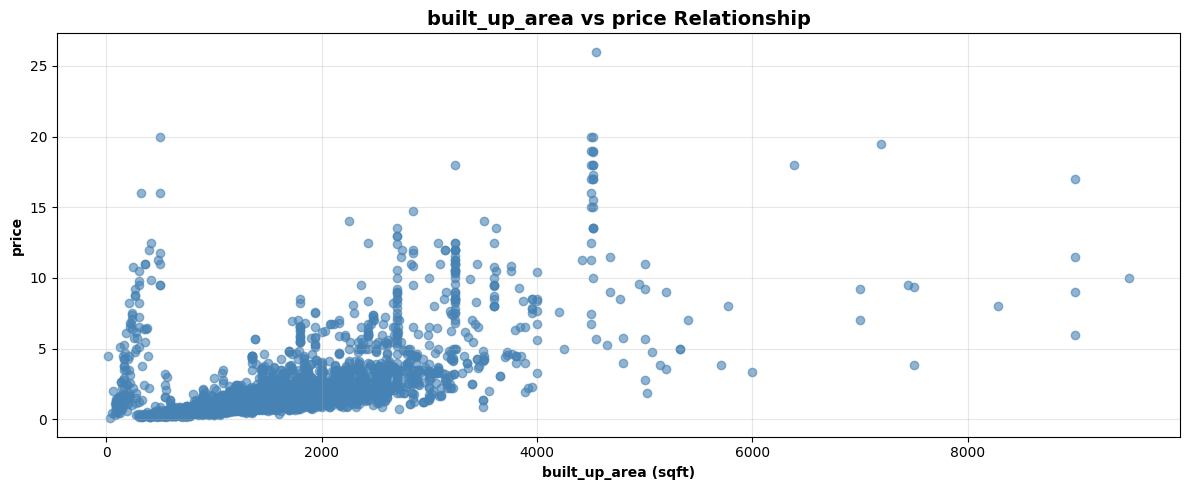

In [198]:
 # Check distribution shape
plt.figure(figsize=(12, 5))
plt.scatter(df['built_up_area'], df['price'], alpha=0.6, color='steelblue')
plt.xlabel('built_up_area (sqft)', fontweight='bold')
plt.ylabel('price', fontweight='bold')
plt.title('built_up_area vs price Relationship', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()

In [199]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] >= 2.4)][['price','area','built_up_area','luxury_score']]

In [200]:
anamoly_df.sample(10)

,price,area,built_up_area,luxury_score
3494,3.60,1449.0,1449.00,67
3473,7.10,2160.0,239.00,118
3470,3.80,1458.0,162.00,94
1245,5.75,2329.0,1900.00,197
1044,2.65,2251.0,1750.75,168
1230,2.50,1711.0,1480.00,193
1404,4.00,2164.0,1958.00,46
2573,2.45,1551.0,1223.00,129
3400,16.00,2700.0,325.00,65
3015,2.50,1900.0,1900.00,0


In [201]:
df['price'].describe()

,price
count,3500.000000
mean,2.228257
std,2.510249
min,0.070000
25%,0.900000
50%,1.450000
75%,2.400000
max,26.000000


In [202]:
# Still there are some points where there exists a significant difference between area and built_up_area
# We are replcaing the built up area by area where such differences exist

In [203]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [204]:
df.update(anamoly_df)

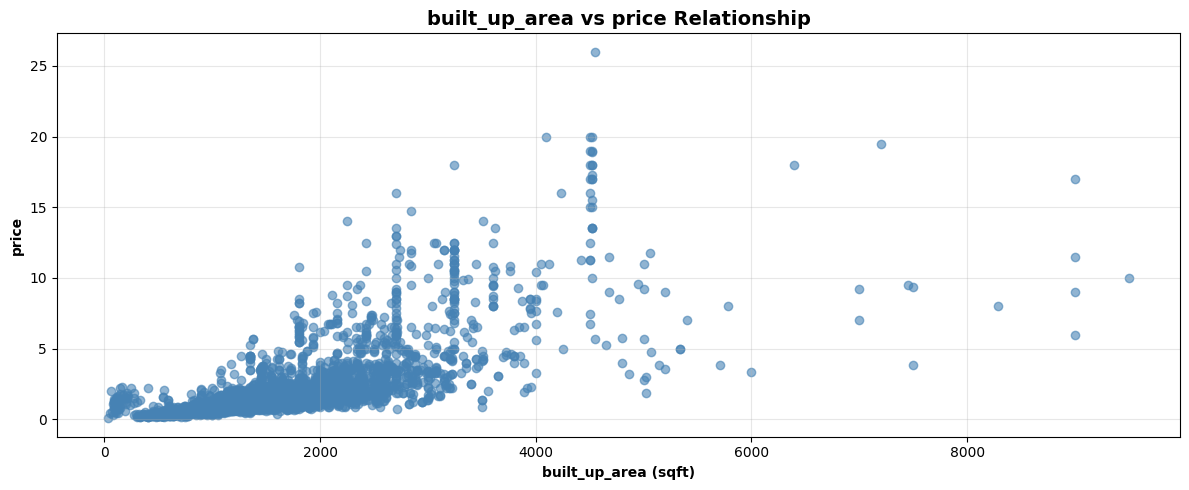

In [205]:
 # Check distribution shape
plt.figure(figsize=(12, 5))
plt.scatter(df['built_up_area'], df['price'], alpha=0.6, color='steelblue')
plt.xlabel('built_up_area (sqft)', fontweight='bold')
plt.ylabel('price', fontweight='bold')
plt.title('built_up_area vs price Relationship', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()

In [206]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area'],inplace=True)

In [207]:
df.shape

(3500, 20)

#### floorNum

In [208]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
pricePerSqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,12
facing,0


In [209]:
df[df['property_type'] == 'house']['floorNum'].median()
df['floorNum'].fillna(2.0,inplace=True)

In [210]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
pricePerSqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,0
facing,0


In [211]:
df[df['society'].isnull() == True]

,property_type,society,sector,price,pricePerSqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,others,store room,pooja room,servant room,furnishing_type,luxury_score,area_per_bedroom
2629,flat,NaN,sector 78,0.6,3692.0,2,2,0,2.0,not available,Under Construction,1625.0,0,0,0,0,0,0,0,812.5


In [212]:
df.drop(index=[2629], inplace=True)

In [213]:
df.shape

(3499, 20)

#### facing

<Axes: ylabel='count'>

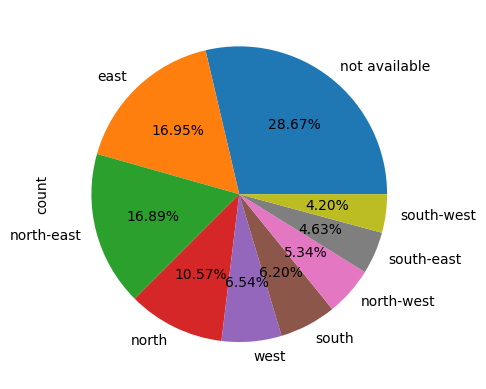

In [214]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

#### Almost 28% values are not available in the column *facing*. We do not have any other information to fill those and this columns is not useful as well. So we drop it.

In [215]:
df.drop(columns=['facing'],inplace=True)

#### agePossession

In [216]:
df_temp = df.copy()

In [217]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1576
New Property,591
Moderately Old,501
Old Property,278
Undefined,277
Under Construction,276


In [218]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [219]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [220]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1704
New Property,634
Moderately Old,526
Old Property,309
Under Construction,282
Undefined,44


In [221]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [222]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [223]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1715
New Property,635
Moderately Old,535
Old Property,321
Under Construction,282
Undefined,11


In [224]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [225]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [226]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1715
New Property,635
Moderately Old,546
Old Property,321
Under Construction,282


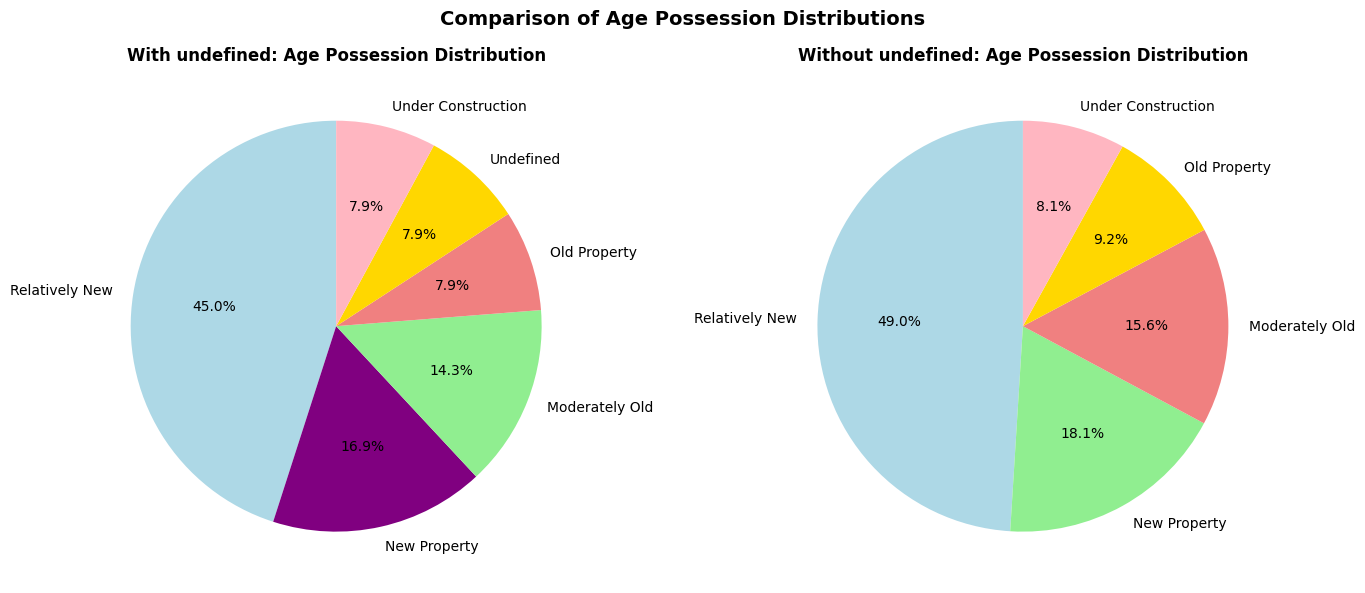

In [230]:
# Enhanced age possession distribution analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First pie chart - df_temp (CORRECTED)
df_temp['agePossession'].value_counts().plot(
    kind='pie',
    autopct='%0.1f%%',
    ax=axes[0],
    startangle=90,
    colors=['lightblue', 'purple','lightgreen', 'lightcoral', 'gold', 'lightpink']
)
axes[0].set_title('With undefined: Age Possession Distribution', fontsize=12, fontweight='bold')
axes[0].set_ylabel('')

# Second pie chart - df (CORRECTED)
df['agePossession'].value_counts().plot(
    kind='pie',
    autopct='%0.1f%%',
    ax=axes[1],
    startangle=90,
    colors=['lightblue', 'lightgreen', 'lightcoral', 'gold', 'lightpink']
)
axes[1].set_title('Without undefined: Age Possession Distribution', fontsize=12, fontweight='bold')
axes[1].set_ylabel('')

plt.suptitle('Comparison of Age Possession Distributions', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [231]:
df.isnull().sum()

,0
property_type,0
society,0
sector,0
price,0
pricePerSqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,0
agePossession,0


In [232]:
# No missing value exists

In [233]:
df.to_csv('missing_values_imputed_data.csv', index=False)